In [2]:
import numpy as np
#import cupy as cpy gpu support
import matplotlib.pyplot as plt

To simulate Brownian motion I am basing my code of the below formula which represents Brownian Motion as a discrete time simulation: 
$$W\left(t_{\left(i+{\Delta\ t}\right)}\right)=W_{t_i}+\sqrt{{\Delta\ t}} \cdot Z_k \sim N(0,1)$$
$W_t$
represents the Brownian motion for all steps up to $i$.
<br> $Z_k$ represents a random standard normal variable with Gaussian distribution mean 0 variance 1.
<br> ${\Delta\ t}$ represents the change in time at each increment.

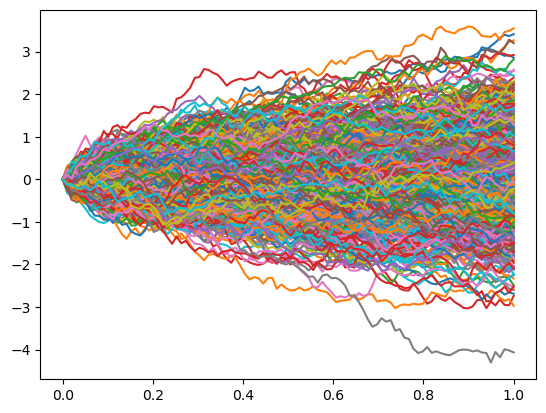

In [135]:
numOfSamples = 100 #number of sample points we are going to be simulating from 0 to T
T = 1. #time horizon simulating brownian motion from time 0 to time T
d = 1000 #number of brownian motions we are going to simulate
times = np.linspace(0.,T,numOfSamples) # set of uniformly distributed times we are going to use inital = 0, upper bound = 1 and numOfSamples for the number of time steps we will be creating
#print(times)
dt = times[1] - times[0] #difference in time since the values are uniformly distrbuted we can subtract the second value of times from the first
# All values in the array are equally seperated with the value dt
dB = np.sqrt(dt) * np.random.normal(size=(numOfSamples-1, d)) #array of differences of Brownian Motion np.sqrt(dt) is the variance
B0 = np.zeros(shape=(1, d)) # an array of 0 of size d 
#print(B0)
B = np.concatenate((B0, np.cumsum(dB, axis = 0)), axis = 0) # cumalative sum over time for each path
plt.plot(times,B)
plt.show()

References:
https://www.youtube.com/watch?v=hqSnruUe3tA
https://www.youtube.com/watch?v=nFrz57vTX5M

One problem with Brownian motion is that the values can go below 0 as seen in figure 1. This isn't a realistic representation of stock prices as they can never be negative. All increments in the brownian motion are completely random, there is no way to incorporate trend.In order to overcome this, we can extend Brownian motion into Geometric Brownian Motion (GBM).
GBM is a lognormal continuos time process and can be represented by the SDE: 

$$dS_t =  \mu S_t dt + \sigma S_t dW_t$$
<br>$S_t \mu dt$ is known as the drift term, representing the average or expected direction of movement.
<br>$\sigma S_t dW_t$ is known as the diffusion term, representing the random and unpredictable fluctuations. 
<br>
<br> $S_t$ is the value of $S$ at time $t$
<br> $dW_t$ is Brownian Motion also known as a Weiner Process which represents randomness component of the SDE.
<br>$\mu $ is the drift representing the expected direction of movement.
<br>$\sigma $ measures the magnitude of random fluctations
<br>
In order to model GBM we need a discretised version of it. It can be represented as
Instead GBM is prefered in finance. Brownian motion can be further extended to Geometric Brownian Motion(GBM) to better represent 

$$S_t = S_0 exp [{(\mu - \frac{\sigma^2}{2})t + \sigma W_t}]$$


https://www.kent.ac.uk/learning/documents/slas-documents/brownian-motion-fm-and-stats.pdf
https://qfeuniversity.com/interview-question-on-geometric-brownian-motion-gbm/


In [128]:
def geometricBrownianMotion(S0, mu, sigma, numofPaths, T, timeSteps):
    dt = T/timeSteps

    # Browniam increments
    dW = np.random.normal(0, np.sqrt(dt), size=(numofPaths, timeSteps)).T

    #Calculation for each step
    drift = (mu - ((sigma**2)/2)) * dt
    diffusion = sigma * dW
    increments = np.exp(drift + diffusion)


    St = np.vstack([np.ones(numofPaths), increments]).cumprod(axis=0) * S0

    return St

Code for generating a histogram:

In [129]:
def makeHist(St):
    min = St[-1,:].min()
    max = St[-1,:].max()
    binSize = np.linspace(min,max, 10)

    last_els1 = St[-1,:]
    plt.hist(last_els1,binSize)

Simulating Geometric Brownian Motion with Values: 
<br>$S_0 = 100$ inital value
<br> $\mu = 0.05$ drift
<br> $\sigma = 0.2 $ diffusion
<br> $100$ the number of paths
<br> $365$ the time period
<br> $T = 1$ the increment 

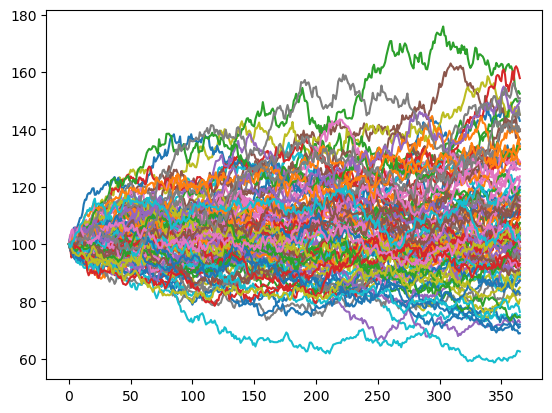

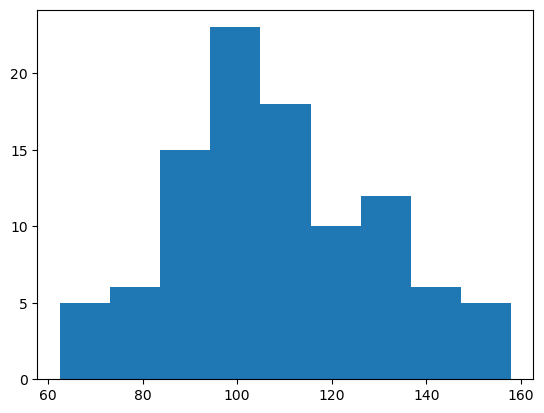

In [ ]:
gBMSim = geometricBrownianMotion(100, 0.05, 0.2, 100, 1.0, 365)
plt.plot(gBMSim)
plt.show()
makeHist(gBMSim)

Geometric Brownian Motion has been simulated for 100 independent paths over 365 days in 1 day increments

Using below method we excute GBM to show how changing values in $\mu$ and $\sigma$ can have an impact on the result

Drift represented as $\mu$ represents the expected direction of movement. 
<br> $\mu > 0:$ Values tend to increase over time. 
<br> $\mu < 0:$ Values tend to decrease over time. 
<br> $\mu = 0:$ No increase or decrease over time, changes due to $\sigma S_t dW_t$ 

Visualising how the GBM model will response with a positive $\mu$
<br>$\mu = 0.5$

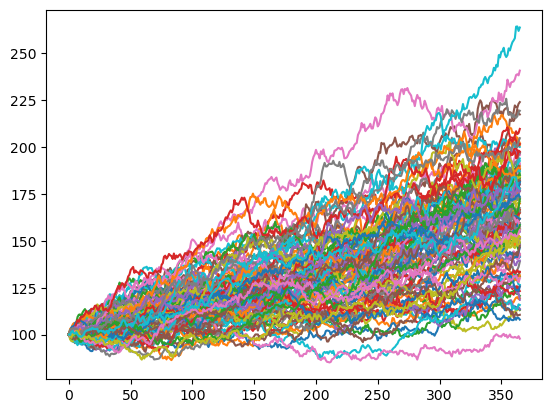

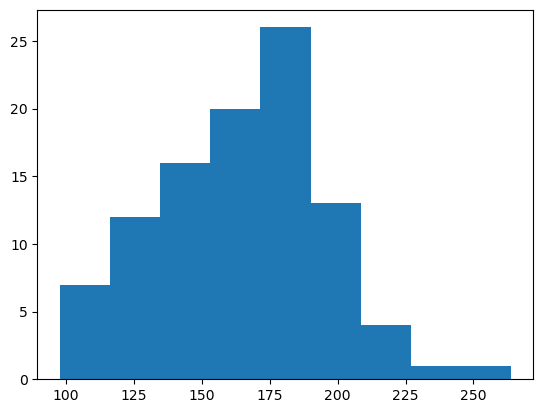

In [122]:
SmiuPos = geometricBrownianMotion(100, 0.5, 0.2, 100, 1.0, 365)
plt.plot(SmiuPos)
plt.show()
makeHist(SmiuPos)


Visualising how the GBM model will response with a negative $\mu$
<br>$\mu = -0.5$

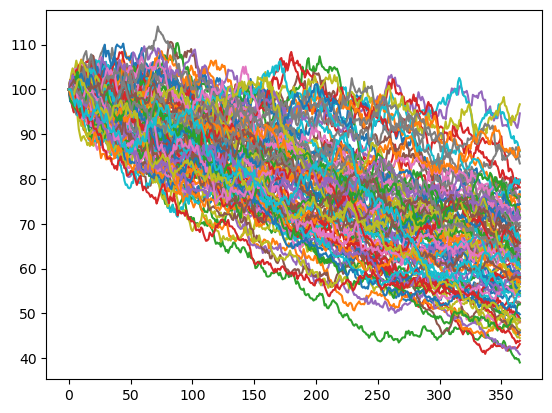

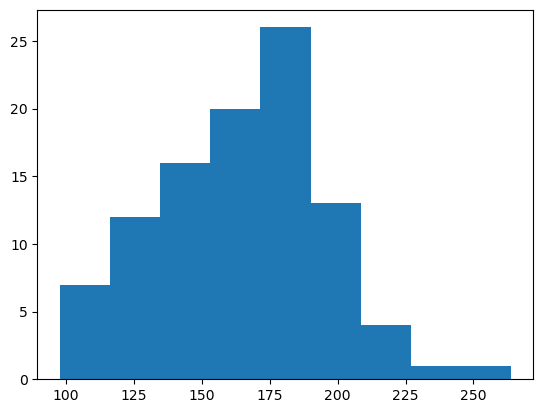

In [123]:
SmiuNeg = geometricBrownianMotion(100, -0.5, 0.2, 100, 1.0, 365)
plt.plot(SmiuNeg)
plt.show()
makeHist(SmiuPos)

$\sigma$ represents the degree of randomness in the process. A higher $\sigma$ represents greater fluctuations between the timesteps.


Visualising how the GBM model will response with a high $\sigma$ value
<br>$\sigma = 0.75$ 

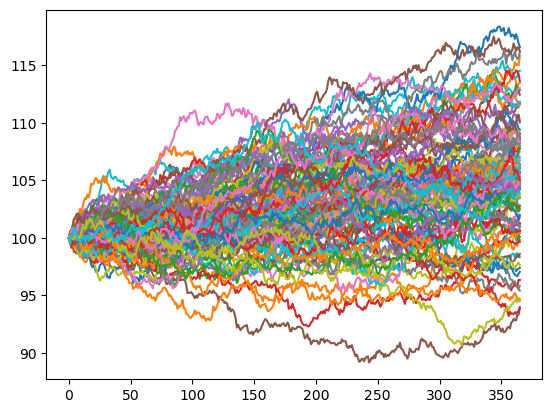

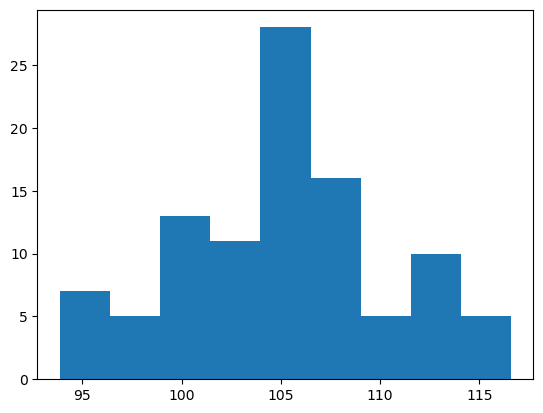

In [124]:
SsigmaLow = geometricBrownianMotion(100, 0.05, 0.05, 100, 1.0, 365)
plt.plot(SsigmaLow)
plt.show()
makeHist(SsigmaLow)


Visualising how the GBM model will response with a smaller $\sigma$ value
<br>$\sigma = 0.05$ 

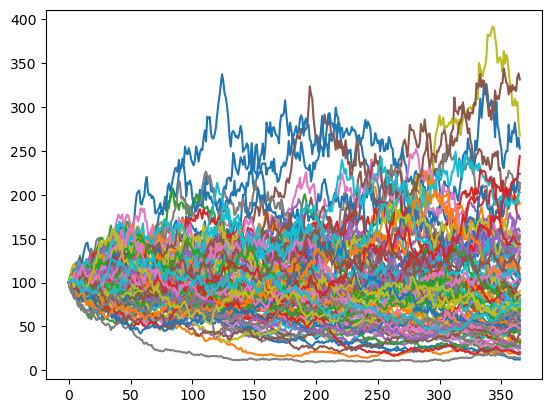

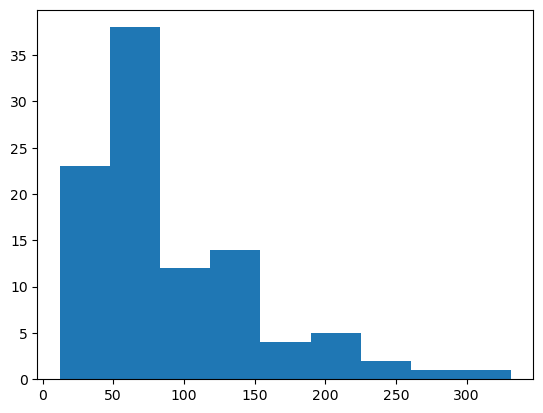

In [125]:
SsigmaHigh = geometricBrownianMotion(100, 0.05, 0.75, 100, 1.0, 365)
plt.plot(SsigmaHigh)
plt.show()
makeHist(SsigmaHigh)